Import data

In [275]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [276]:
emails = pd.read_csv('emails.csv')
email_info = pd.read_csv('email_info.csv')
email_template_groups = pd.read_csv('email_template_groups.csv')


In [277]:
data = pd.merge(emails, email_info, how = 'left', on = 'email_id')
data = pd.merge(data, email_template_groups, how = 'left', on = 'email_template_id')

In [278]:
print(emails.shape)
print(email_template_groups.shape)
print(email_info.shape)
print(data.shape)

(204057, 7)
(140, 2)
(207510, 3)
(204057, 10)


In [279]:
data.head()

,email_id,customer_id,date,last_open,last_click,open,click,email_template_id,content_id,email_template_group
0,XJ-222951510,xx1UxxxxxxswYTuNFR,2021-08-11 07:50:00,2021-08-11 21:35:00,NaN,True,False,T0159,BLITCJF48T,Educational
1,XJ-222932815,xx11UxxxxxxVUOGVF1,2021-07-01 06:07:00,NaN,NaN,False,False,T0157,1IE0CLHEJJ,Engagement
2,XJ-222980459,xx1UxxxxxxswI5tNFJ,2021-10-07 07:45:00,NaN,NaN,False,False,T0159,S0RNNDCE72,Educational
3,XJ-222978917,xx1Uxxxxx1xUuZZNFx,2021-09-23 12:26:00,NaN,NaN,False,False,T0159,4CLWFGQ19K,Educational
4,XJ-222956026,xx1UxxxxxxswSvxNFJ,2021-07-27 14:47:00,2021-08-06 08:28:00,NaN,True,False,T0155,NaN,Educational


In [280]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204057 entries, 0 to 204056
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   email_id              204057 non-null  object
 1   customer_id           204057 non-null  object
 2   date                  204057 non-null  object
 3   last_open             102430 non-null  object
 4   last_click            21091 non-null   object
 5   open                  204057 non-null  bool  
 6   click                 204057 non-null  bool  
 7   email_template_id     204057 non-null  object
 8   content_id            173097 non-null  object
 9   email_template_group  204057 non-null  object
dtypes: bool(2), object(8)
memory usage: 14.4+ MB


In [281]:
data['date'] = pd.to_datetime(data['date'])
data['last_open'] = pd.to_datetime(data['last_open'])
data['last_click'] = pd.to_datetime(data['last_click'])

In [282]:
data.head()

,email_id,customer_id,date,last_open,last_click,open,click,email_template_id,content_id,email_template_group
0,XJ-222951510,xx1UxxxxxxswYTuNFR,2021-08-11 07:50:00,2021-08-11 21:35:00,NaT,True,False,T0159,BLITCJF48T,Educational
1,XJ-222932815,xx11UxxxxxxVUOGVF1,2021-07-01 06:07:00,NaT,NaT,False,False,T0157,1IE0CLHEJJ,Engagement
2,XJ-222980459,xx1UxxxxxxswI5tNFJ,2021-10-07 07:45:00,NaT,NaT,False,False,T0159,S0RNNDCE72,Educational
3,XJ-222978917,xx1Uxxxxx1xUuZZNFx,2021-09-23 12:26:00,NaT,NaT,False,False,T0159,4CLWFGQ19K,Educational
4,XJ-222956026,xx1UxxxxxxswSvxNFJ,2021-07-27 14:47:00,2021-08-06 08:28:00,NaT,True,False,T0155,NaN,Educational


In [283]:
data_new = data.copy()

In [284]:
data_new.drop(['date', 'email_template_id', 'content_id'], axis = 1, inplace = True)

In [285]:
data_new.head()

,email_id,customer_id,last_open,last_click,open,click,email_template_group
0,XJ-222951510,xx1UxxxxxxswYTuNFR,2021-08-11 21:35:00,NaT,True,False,Educational
1,XJ-222932815,xx11UxxxxxxVUOGVF1,NaT,NaT,False,False,Engagement
2,XJ-222980459,xx1UxxxxxxswI5tNFJ,NaT,NaT,False,False,Educational
3,XJ-222978917,xx1Uxxxxx1xUuZZNFx,NaT,NaT,False,False,Educational
4,XJ-222956026,xx1UxxxxxxswSvxNFJ,2021-08-06 08:28:00,NaT,True,False,Educational


In [286]:
data_new

,email_id,customer_id,last_open,last_click,open,click,email_template_group
0,XJ-222951510,xx1UxxxxxxswYTuNFR,2021-08-11 21:35:00,NaT,True,False,Educational
1,XJ-222932815,xx11UxxxxxxVUOGVF1,NaT,NaT,False,False,Engagement
2,XJ-222980459,xx1UxxxxxxswI5tNFJ,NaT,NaT,False,False,Educational
3,XJ-222978917,xx1Uxxxxx1xUuZZNFx,NaT,NaT,False,False,Educational
4,XJ-222956026,xx1UxxxxxxswSvxNFJ,2021-08-06 08:28:00,NaT,True,False,Educational
...,...,...,...,...,...,...,...
204052,XJ-222482928,xx1UxxxxxxswUioNFJ,NaT,NaT,False,False,Educational
204053,XJ-222482816,xx1UxxxxxxswYFQNF2,2020-07-23 14:03:00,2020-07-23 13:50:00,True,True,Educational
204054,XJ-222482166,xx1UxxxxxxswRWsNFR,NaT,NaT,False,False,Educational
204055,XJ-222482042,xx1UxxxxxxswVPwNFR,2020-07-25 11:50:00,NaT,True,False,Educational


In [287]:
data_new['open_month'] = data_new['last_open'].dt.strftime('%B')
data_new['click_month'] = data_new['last_click'].dt.strftime('%B')
data_new['open_day'] = data_new['last_open'].dt.strftime('%A')
data_new['click_day'] = data_new['last_click'].dt.strftime('%A')
data_new['open_hour'] = data_new['last_open'].dt.hour
data_new['click_hour'] = data_new['last_click'].dt.hour



In [288]:
data_new.head()

,email_id,customer_id,last_open,last_click,open,click,email_template_group,open_month,click_month,open_day,click_day,open_hour,click_hour
0,XJ-222951510,xx1UxxxxxxswYTuNFR,2021-08-11 21:35:00,NaT,True,False,Educational,August,NaN,Wednesday,NaN,21.0,NaN
1,XJ-222932815,xx11UxxxxxxVUOGVF1,NaT,NaT,False,False,Engagement,NaN,NaN,NaN,NaN,NaN,NaN
2,XJ-222980459,xx1UxxxxxxswI5tNFJ,NaT,NaT,False,False,Educational,NaN,NaN,NaN,NaN,NaN,NaN
3,XJ-222978917,xx1Uxxxxx1xUuZZNFx,NaT,NaT,False,False,Educational,NaN,NaN,NaN,NaN,NaN,NaN
4,XJ-222956026,xx1UxxxxxxswSvxNFJ,2021-08-06 08:28:00,NaT,True,False,Educational,August,NaN,Friday,NaN,8.0,NaN


In [289]:
data_new['open'] = data_new['open'].apply(lambda x: 1 if x == True else 0)
data_new['click'] = data_new['click'].apply(lambda x: 1 if x == True else 0)

In [290]:
sns.set_style('whitegrid')
sns.set_palette('Set2')

In [291]:
open = data_new.groupby('open_day')['open'].sum().reset_index().sort_values('open', ascending=False)
open

,open_day,open
6,Wednesday,18646
5,Tuesday,18592
1,Monday,18559
4,Thursday,17690
0,Friday,16429
2,Saturday,6549
3,Sunday,5965


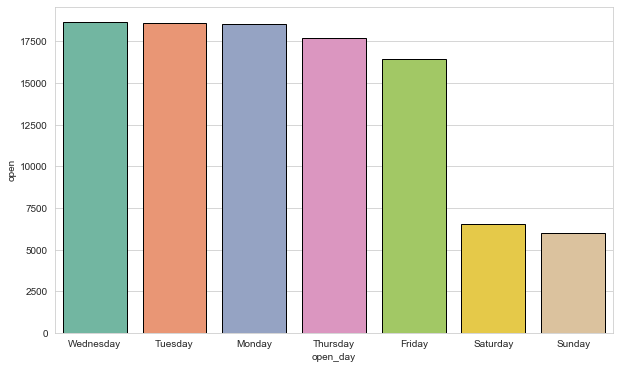

In [292]:
plt.figure(figsize=(10,6))
sns.barplot(data = open, x = 'open_day', y = 'open', order = open.sort_values('open', ascending=False).open_day, edgecolor = 'black')

In [293]:
click = data_new.groupby('click_day')['click'].sum().reset_index().sort_values('click', ascending=False)
click

,click_day,click
5,Tuesday,4003
6,Wednesday,3986
4,Thursday,3895
1,Monday,3570
0,Friday,3123
2,Saturday,1308
3,Sunday,1206


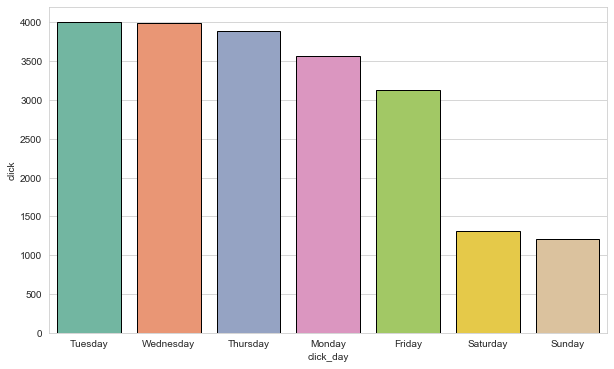

In [294]:
plt.figure(figsize=(10,6))
sns.barplot(data = click, x = 'click_day', y = 'click', order = click.sort_values('click', ascending=False).click_day, edgecolor = 'black')

In [295]:
click_time = data_new.groupby('click_hour')['click'].sum().reset_index().sort_values('click', ascending=False)
click_time['click_hour'] = click_time['click_hour'].astype(int)
click_time

,click_hour,click
18,18,1942
17,17,1860
16,16,1584
19,19,1417
15,15,1393
11,11,1318
12,12,1313
10,10,1279
14,14,1194
13,13,1186


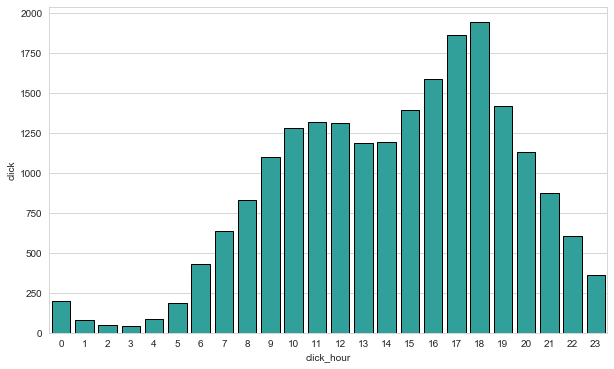

In [296]:
plt.figure(figsize=(10,6))
sns.barplot(data = click_time, x = 'click_hour', y = 'click',  edgecolor = 'black', color='lightseagreen')

In [297]:
click_time_temp = data_new.groupby(['click_hour','email_template_group'])['click'].sum().reset_index().sort_values(['click', 'email_template_group'], ascending=False)
click_time_temp['click_hour'] = click_time_temp['click_hour'].astype(int)


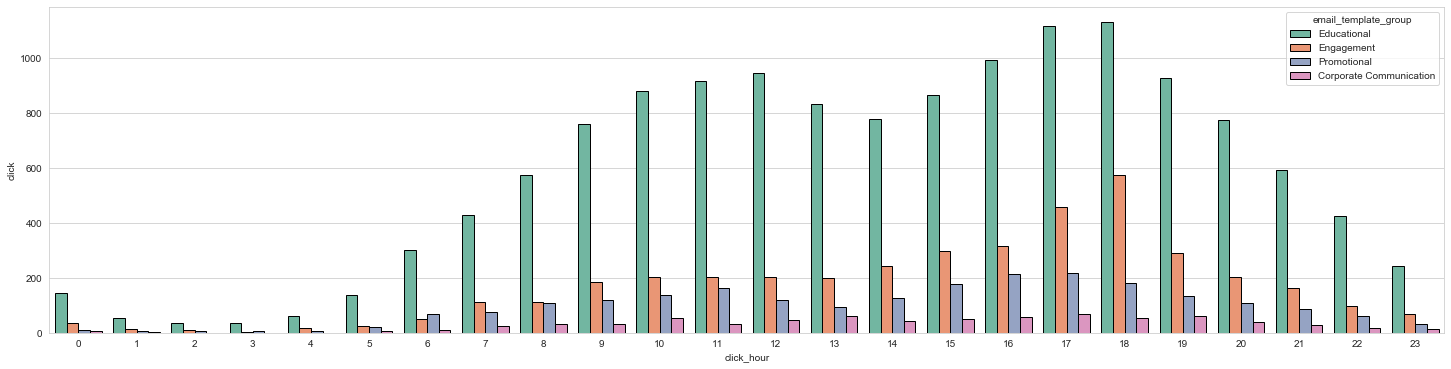

In [298]:
plt.figure(figsize=(25,6))
sns.barplot(data = click_time_temp, x = 'click_hour', y = 'click', edgecolor = 'black', hue = 'email_template_group')

In [299]:
CTOR = round((sum(data_new['click'] / sum(data['open']))) * 100,2)
CTOR

20.59

In [300]:
open_rate = round((sum(data_new['open'] / (data['email_id']).count())) * 100,2)
open_rate

50.2

In [301]:
click_day_temp = data_new.groupby(['click_day','email_template_group'])['click'].sum().reset_index().sort_values(['click', 'email_template_group'], ascending=False)


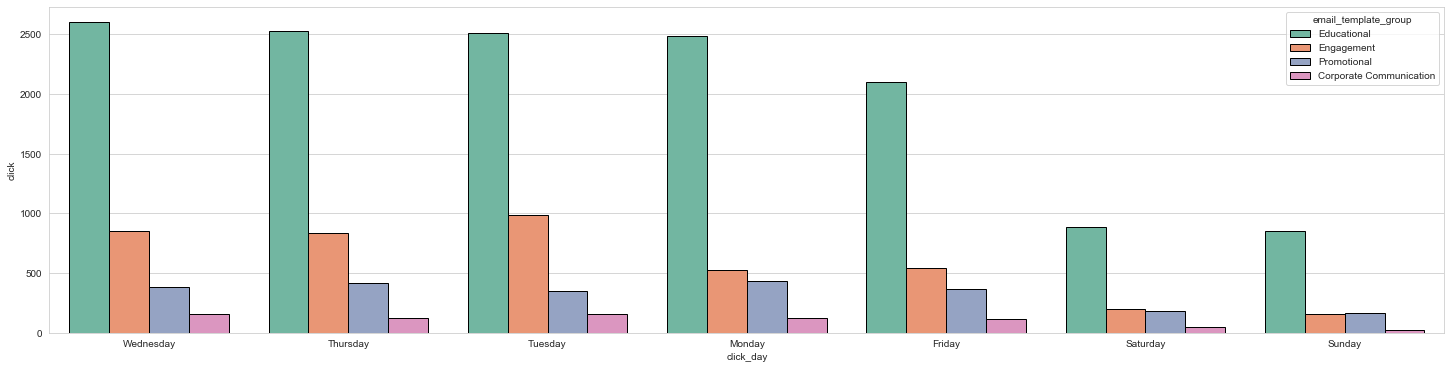

In [392]:
plt.figure(figsize=(25,6))
sns.barplot(data = click_day_temp, x = 'click_day', y = 'click', edgecolor = 'black', hue = 'email_template_group')

In [303]:
click_day_temp['max_rank'] = click_day_temp['click'].rank(method = 'dense')

In [304]:
click_day_temp.drop('max_rank', axis = 1, inplace=True)

In [305]:
click_day_temp

,click_day,email_template_group,click
25,Wednesday,Educational,2601
17,Thursday,Educational,2525
21,Tuesday,Educational,2510
5,Monday,Educational,2485
1,Friday,Educational,2098
22,Tuesday,Engagement,988
9,Saturday,Educational,882
13,Sunday,Educational,856
26,Wednesday,Engagement,849
18,Thursday,Engagement,832


In [322]:
recom = data_new['customer_id']

In [328]:
recom.describe()

count                 204057
unique                 21166
top       xx1UxxxxxxswVVYNF2
freq                      74
Name: customer_id, dtype: object

In [334]:
recom = recom.unique()
recom = pd.DataFrame(recom)
recom.rename({0:'customer_id'}, axis=1, inplace=True)

In [350]:
recom.head()

,customer_id
0,xx1UxxxxxxswYTuNFR
1,xx11UxxxxxxVUOGVF1
2,xx1UxxxxxxswI5tNFJ
3,xx1Uxxxxx1xUuZZNFx
4,xx1UxxxxxxswSvxNFJ


In [351]:
data_new.head()

,email_id,customer_id,last_open,last_click,open,click,email_template_group,open_month,click_month,open_day,click_day,open_hour,click_hour
0,XJ-222951510,xx1UxxxxxxswYTuNFR,2021-08-11 21:35:00,NaT,1,0,Educational,August,NaN,Wednesday,NaN,21.0,NaN
1,XJ-222932815,xx11UxxxxxxVUOGVF1,NaT,NaT,0,0,Engagement,NaN,NaN,NaN,NaN,NaN,NaN
2,XJ-222980459,xx1UxxxxxxswI5tNFJ,NaT,NaT,0,0,Educational,NaN,NaN,NaN,NaN,NaN,NaN
3,XJ-222978917,xx1Uxxxxx1xUuZZNFx,NaT,NaT,0,0,Educational,NaN,NaN,NaN,NaN,NaN,NaN
4,XJ-222956026,xx1UxxxxxxswSvxNFJ,2021-08-06 08:28:00,NaT,1,0,Educational,August,NaN,Friday,NaN,8.0,NaN


In [368]:
days = data_new.groupby(['customer_id', 'click_day'])['click'].sum().reset_index().sort_values(['customer_id', 'click'], ascending=[True, False])
days.head(20)

,customer_id,click_day,click
1,xx11Uxxxx21gotoVFF,Monday,3
0,xx11Uxxxx21gotoVFF,Friday,2
4,xx11Uxxxx21gotoVFF,Tuesday,2
2,xx11Uxxxx21gotoVFF,Saturday,1
3,xx11Uxxxx21gotoVFF,Thursday,1
5,xx11Uxxxx21gotoVFF,Wednesday,1
6,xx11Uxxxx21gpOlVFN,Friday,1
7,xx11Uxxxx21gpOlVFN,Monday,1
8,xx11Uxxxx21gpOlVFN,Saturday,1
10,xx11Uxxxx21gsnQVFV,Monday,2


In [389]:
days['rank'] = days.groupby('customer_id').cumcount() + 1
days.head(20)

,customer_id,click_day,click,rank
1,xx11Uxxxx21gotoVFF,Monday,3,1
0,xx11Uxxxx21gotoVFF,Friday,2,2
4,xx11Uxxxx21gotoVFF,Tuesday,2,3
2,xx11Uxxxx21gotoVFF,Saturday,1,4
3,xx11Uxxxx21gotoVFF,Thursday,1,5
5,xx11Uxxxx21gotoVFF,Wednesday,1,6
6,xx11Uxxxx21gpOlVFN,Friday,1,1
7,xx11Uxxxx21gpOlVFN,Monday,1,2
8,xx11Uxxxx21gpOlVFN,Saturday,1,3
10,xx11Uxxxx21gsnQVFV,Monday,2,1


In [398]:
recom_days = days[days['rank']==1]
recom_days

,customer_id,click_day,click,rank
1,xx11Uxxxx21gotoVFF,Monday,3,1
6,xx11Uxxxx21gpOlVFN,Friday,1,1
10,xx11Uxxxx21gsnQVFV,Monday,2,1
13,xx11Uxxxx21gumzVFF,Monday,1,1
14,xx11Uxxxx21gy5GVFV,Saturday,1,1
...,...,...,...,...
16244,xx1xGxxxx2xrNucVFJ,Friday,2,1
16249,xx1xGxxxx2xrNupVFJ,Sunday,2,1
16251,xx1xGxxxx2xrNuuVFJ,Saturday,1,1
16252,xx1xGxxxx2xrTK9VFR,Tuesday,1,1


In [394]:
hours = data_new.groupby(['customer_id', 'click_hour'])['click'].sum().reset_index().sort_values(['customer_id', 'click'], ascending=[True, False])
hours.head(20)

,customer_id,click_hour,click
2,xx11Uxxxx21gotoVFF,13.0,2
4,xx11Uxxxx21gotoVFF,16.0,2
6,xx11Uxxxx21gotoVFF,21.0,2
0,xx11Uxxxx21gotoVFF,11.0,1
1,xx11Uxxxx21gotoVFF,12.0,1
3,xx11Uxxxx21gotoVFF,15.0,1
5,xx11Uxxxx21gotoVFF,17.0,1
7,xx11Uxxxx21gpOlVFN,7.0,2
8,xx11Uxxxx21gpOlVFN,10.0,1
9,xx11Uxxxx21gsnQVFV,6.0,1


In [395]:
hours['rank'] = hours.groupby('customer_id').cumcount() + 1
hours.head(20)

,customer_id,click_hour,click,rank
2,xx11Uxxxx21gotoVFF,13.0,2,1
4,xx11Uxxxx21gotoVFF,16.0,2,2
6,xx11Uxxxx21gotoVFF,21.0,2,3
0,xx11Uxxxx21gotoVFF,11.0,1,4
1,xx11Uxxxx21gotoVFF,12.0,1,5
3,xx11Uxxxx21gotoVFF,15.0,1,6
5,xx11Uxxxx21gotoVFF,17.0,1,7
7,xx11Uxxxx21gpOlVFN,7.0,2,1
8,xx11Uxxxx21gpOlVFN,10.0,1,2
9,xx11Uxxxx21gsnQVFV,6.0,1,1


In [396]:
recom_hours = hours[hours['rank']==1]

In [397]:
recom_hours

,customer_id,click_hour,click,rank
2,xx11Uxxxx21gotoVFF,13.0,2,1
7,xx11Uxxxx21gpOlVFN,7.0,2,1
9,xx11Uxxxx21gsnQVFV,6.0,1,1
15,xx11Uxxxx21gumzVFF,20.0,1,1
16,xx11Uxxxx21gy5GVFV,18.0,1,1
...,...,...,...,...
18439,xx1xGxxxx2xrNucVFJ,17.0,3,1
18442,xx1xGxxxx2xrNupVFJ,19.0,2,1
18443,xx1xGxxxx2xrNuuVFJ,17.0,1,1
18444,xx1xGxxxx2xrTK9VFR,13.0,1,1


In [408]:
recommender = recom.merge(recom_days, how = 'left', on= 'customer_id')
recommender = recommender.merge(recom_hours, how = 'left', on= 'customer_id')
recommender.drop(['click_x','click_y', 'rank_x', 'rank_y'], axis = 1, inplace=True)

In [417]:
recommender['click_hour'].mode()

0    10.0
dtype: float64

In [426]:
recommender['click_hour'].fillna(10, inplace=True)
recommender['click_hour'] = recommender['click_hour'].astype(int)

In [428]:
recommender['click_day'].mode()

0    Friday
dtype: object

In [429]:
recommender['click_day'].fillna('Friday', inplace=True)


"Recommender" for every customer to know on what day and which hour to send them an email


In [433]:
#Recommender works by taking all customer_ids and finds out at what day are they clicking on the mail. Next step is for the hour at which they clicked on mostly.
#Combine those 3 columns in a single dataset and fill null values for days and hours by using mode. (mode because it will tell us what is the most frequent time and day for whole column)

In [431]:
recommender.head(20)

,customer_id,click_day,click_hour
0,xx1UxxxxxxswYTuNFR,Friday,10
1,xx11UxxxxxxVUOGVF1,Friday,10
2,xx1UxxxxxxswI5tNFJ,Friday,12
3,xx1Uxxxxx1xUuZZNFx,Friday,10
4,xx1UxxxxxxswSvxNFJ,Thursday,19
5,xx1UxxxxxxswLRPNF2,Friday,10
6,xx1UxxxxxxswYQoNFR,Friday,10
7,xx1UxxxxxxswPcUNFU,Friday,10
8,xx1UxxxxxxswYrFNFU,Saturday,19
9,xx1UxxxxxxswQWYNF2,Friday,10
